In [ ]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# memanggil dataset lewat gdrive
path = "/content/gdrive/My Drive/semester7/MachineLearning/praktikum_ml/praktikum07"

In [ ]:
# Import library pandas untuk membaca data
import pandas as pd

# Membaca dataset Iris dari folder drive
df = pd.read_csv(path + "/data/apples_and_oranges.csv")

# Menampilkan 5 data pertama untuk memastikan dataset berhasil dibaca
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [ ]:
# Melihat informasi umum dataset seperti jumlah data, tipe data, dan missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
# Menampilkan statistik deskriptif seperti mean, min, max, dan std deviasi untuk setiap kolom numerik
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [ ]:
# Library SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (dibutuhkan untuk 3D)
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Pisah kan fitur
X = df[['Weight', 'Size']]
y = df['Class']

In [ ]:
# Encode label (apple/orange → 0/1)
le = LabelEncoder()
y = le.fit_transform(y)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# menampilkan jumlah pembagian dataset
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 32
Jumlah data test: 8


In [ ]:
# Standarisasi fitur (penting untuk SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Buat dan latih model SVM (pakai kernel linear)
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test_scaled)

In [ ]:
# Menampilkan hasil akurasi model
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%
Confusion Matrix:
 [[3 0]
 [0 5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



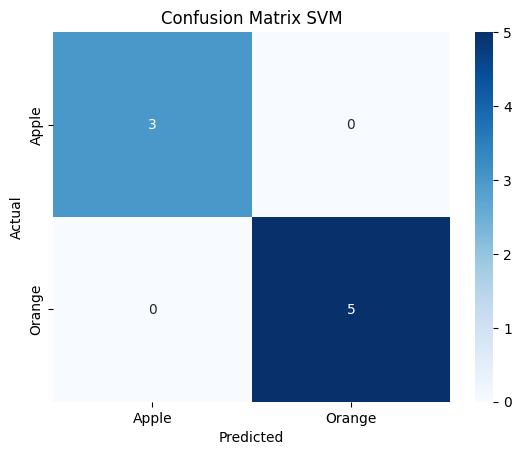

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Apple','Orange'], yticklabels=['Apple','Orange'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()

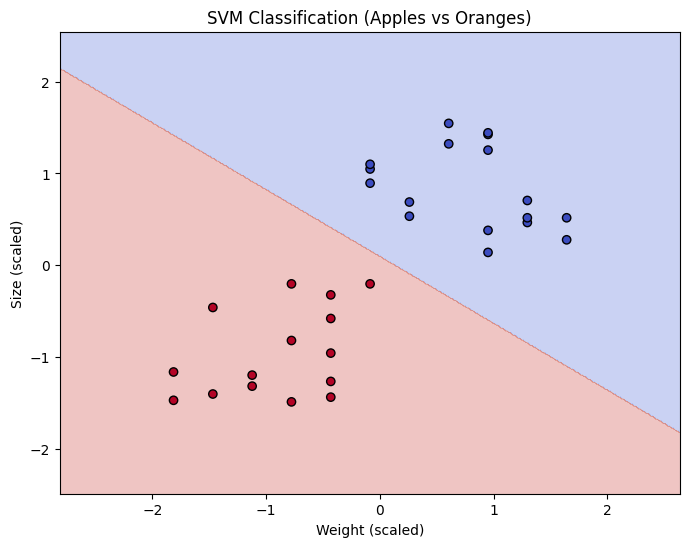

In [ ]:
# Visualisasi decision boundary
import numpy as np

plt.figure(figsize=(8,6))
X_set, y_set = X_train_scaled, y_train

# buat grid titik
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
    np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01)
)

# gambar batas pemisah
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.3, cmap='coolwarm')

plt.scatter(X_set[:,0], X_set[:,1], c=y_set, cmap='coolwarm', edgecolors='k')
plt.title('SVM Classification (Apples vs Oranges)')
plt.xlabel('Weight (scaled)')
plt.ylabel('Size (scaled)')
plt.show()

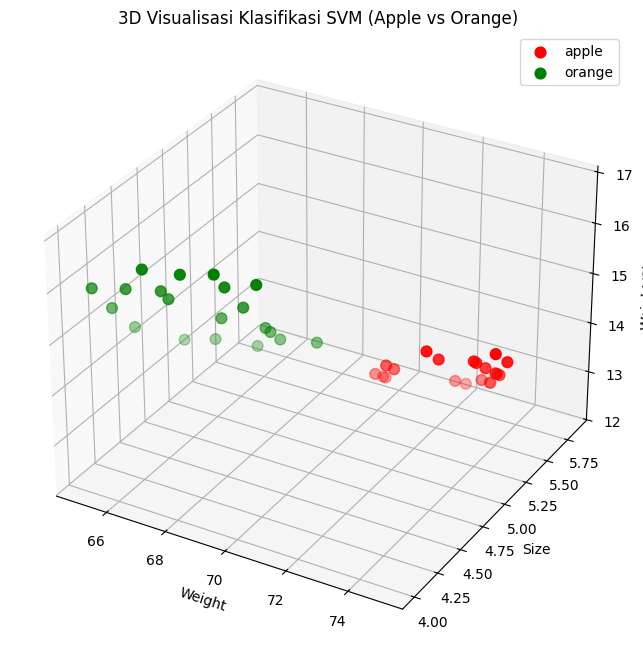

In [ ]:
# Membuat fitur tambahan (rekayasa) untuk sumbu Z
df['Weight_to_Size'] = df['Weight'] / df['Size']

# Plot 3D untuk melihat pemisahan kelas
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g']  # apple, orange
labels = ['apple', 'orange']

# Plot tiap kelas dengan warna berbeda
for i, cls_name in enumerate(labels):
    subset = df[df['Class'] == cls_name]
    ax.scatter(
        subset['Weight'],
        subset['Size'],
        subset['Weight_to_Size'],
        c=colors[i],
        label=cls_name,
        s=60
    )

# Label sumbu
ax.set_xlabel('Weight')
ax.set_ylabel('Size')
ax.set_zlabel('Weight/Size')
ax.set_title('3D Visualisasi Klasifikasi SVM (Apple vs Orange)')
ax.legend()
plt.show()

# *MODEL REGRESSION LOGISTIK*

In [ ]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, RocCurveDisplay)

In [ ]:
# memanggil dataset lewat gdrive
path = "/content/gdrive/My Drive/semester7/MachineLearning/praktikum_ml/praktikum07"
df_lr = pd.read_csv(path + "/data/apples_and_oranges.csv")
df_lr.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [ ]:
df_lr.info()
df_lr.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [ ]:
le_lr = LabelEncoder()
df_lr['Class_bin'] = le_lr.fit_transform(df_lr['Class'])
df_lr['Class_bin'].value_counts()

,count
Class_bin,
1,20
0,20


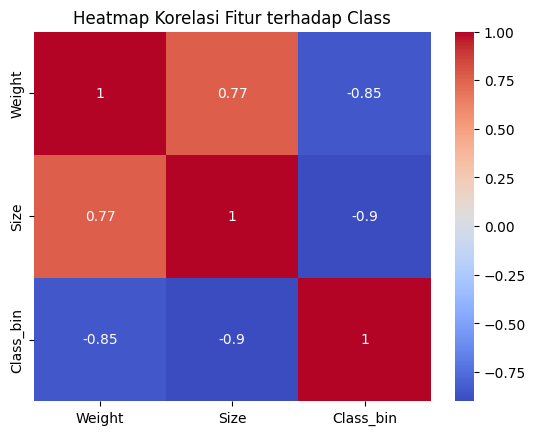

In [ ]:
corr = df_lr[['Weight','Size','Class_bin']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur terhadap Class')
plt.show()

In [ ]:
X_lr = df_lr[['Weight','Size']]
y_lr = df_lr['Class_bin']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42, stratify=y_lr
)

In [ ]:
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_test_lr_scaled  = scaler_lr.transform(X_test_lr)

In [ ]:
model_lr = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)
model_lr.fit(X_train_lr_scaled, y_train_lr)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [ ]:
y_pred_lr = model_lr.predict(X_test_lr_scaled)
y_prob_lr = model_lr.predict_proba(X_test_lr_scaled)[:,1]

acc  = accuracy_score(y_test_lr, y_pred_lr)
prec = precision_score(y_test_lr, y_pred_lr)
rec  = recall_score(y_test_lr, y_pred_lr)
f1   = f1_score(y_test_lr, y_pred_lr)
auc  = roc_auc_score(y_test_lr, y_prob_lr)

print(f"Akurasi  : {acc:.3f}")
print(f"Presisi  : {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-Score : {f1:.3f}")
print(f"ROC-AUC  : {auc:.3f}")

Akurasi  : 1.000
Presisi  : 1.000
Recall   : 1.000
F1-Score : 1.000
ROC-AUC  : 1.000


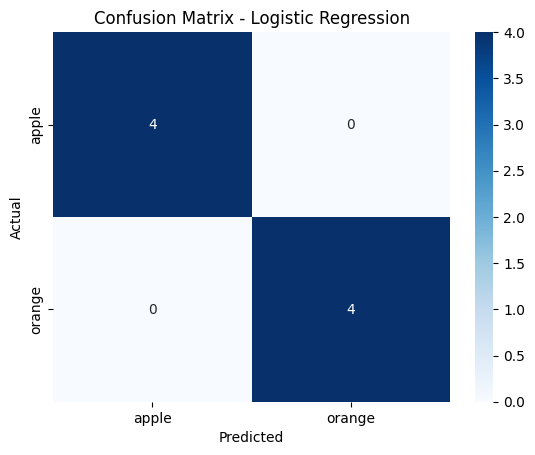

In [ ]:
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_lr.classes_, yticklabels=le_lr.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()

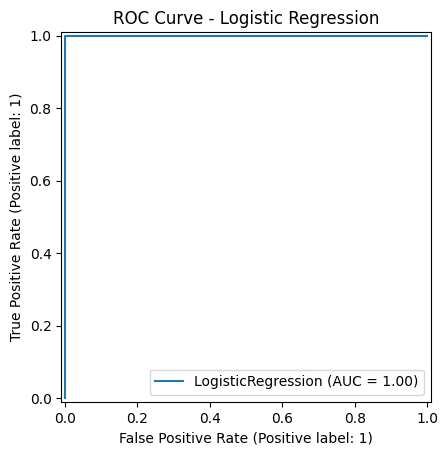

In [ ]:
RocCurveDisplay.from_estimator(model_lr, X_test_lr_scaled, y_test_lr)
plt.title('ROC Curve - Logistic Regression')
plt.show()


In [ ]:
print(classification_report(y_test_lr, y_pred_lr, target_names=le_lr.classes_))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [ ]:
coef_df = pd.DataFrame({
    'Fitur'       : ['Weight','Size'],
    'Koefisien'   : model_lr.coef_[0],
    'Odds Ratio'  : np.exp(model_lr.coef_[0])
})
coef_df

,Fitur,Koefisien,Odds Ratio
0,Weight,-1.465614,0.230936
1,Size,-1.711286,0.180633


In [ ]:
sample = pd.DataFrame({'Weight':[160],'Size':[7.2]})
sample_scaled = scaler_lr.transform(sample)
prob = model_lr.predict_proba(sample_scaled)[0,1]
pred = model_lr.predict(sample_scaled)[0]
print(f"Probabilitas Orange: {prob:.4f} → Prediksi: {le_lr.inverse_transform([pred])[0]}")


Probabilitas Orange: 0.0000 → Prediksi: apple
